# カーネル関数
- 線形カーネルとガウスカーネルの性質を確認しよう

## 0. 用語の復習
※ 以下の$k( \mathbf{x}_i, \mathbf{x}_j)$はカーネル関数を表す記号  

### (1) 線形カーネル関数
 
- データ$\mathbf{x}_i$とデータ$\mathbf{x}_j$の内積と同じ計算
    - ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$が同じ方向を向いていて各要素の値が大きいほど値が大きくなる
    - 線形カーネルを用いてSVMを解くと、線形の決定境界しか得られない    
- $k( \mathbf{x}_i, \mathbf{x}_j)=\mathbf{x}_i^T \mathbf{x}_j$ 
    - $\mathbf{x}_i=(x_1,x_2,...x_d)$:多次元変数  
    - $\mathbf{x}_j=(x_1,x_2,...x_d)$:多次元変数  
    - $d$ : データの次元  
    - $i,j = 1,2,3,...N$  
    - $N$: データ数  

### (2) ガウスカーネル関数
- 非線形カーネルのうち、最もよく用いられるもの
    - ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$の差が小さいほど値が大きくなる
- $k( \mathbf{x}_i, \mathbf{x}_j)=\mathrm{exp}(-\gamma \|\mathbf{x}_i- \mathbf{x}_j\|^2)$  
    - $\mathbf{x}_i=(x_1,x_2,...x_d)$:多次元変数  
    - $\mathbf{x}_j=(x_1,x_2,...x_d)$:多次元変数  
    - $d$ : データの次元  
    - $i,j = 1,2,3,...N$  
    - $N$: データの個数
    - $\gamma$:データのまとまり具合(ばらつきの逆)を表すパラメータ

## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. ガウスカーネル関数のグラフ
- $y = \exp(-\gamma x^2)$とおく

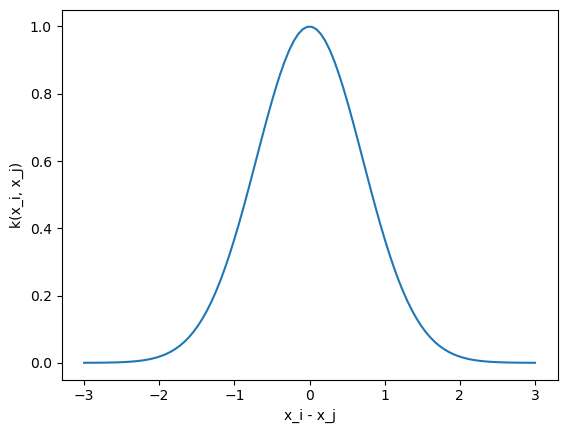

In [2]:
# パラメータの設定
gamma = 1

# 横軸の値を生成
x = np.linspace(-3,3,100)
# 縦軸の値を計算
y = np.exp(-gamma*np.power(x,2))

# グラフの表示
sns.lineplot(x=x,y=y)
plt.ylabel("k(x_i, x_j)")
plt.xlabel("x_i - x_j")
plt.show()

- 正規分布に似た分布となる
- パラメータ$\gamma$は、分布の集まり具合を表す変数 
    - 大きいほど分布が細くなる
- ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$の差が小さいほど値が大きくなる
    - y軸は、ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$の近さを表す量

### [演習]
- $\gamma$の値を変えて、グラフの変化を確認してみよう

## 3. カーネル関数の適用（2次元）
* ガウスカーネル関数と線形カーネル関数のそれぞれを適用した場合の違いを確認


### 3-1. 疑似データの作成

In [3]:
# データを作成する関数
def make_dataset(DATA_TYPE):
    if DATA_TYPE==1:
        """
        線形分離可能なデータセット
        """
        X1 = np.array([
            [-0.5, -0.3, -0.3, -0.1, -0.1,  0.1,  0.1,  0.3,  0.3],
            [   0, -0.6,  0.6, -1.3,  1.3, -1.9,  1.9, -2.5,  2.5]])
        X2 = np.array([
            [ 0.5,  0.7,  0.9,  1.0],
            [   0,    0,    0,    0]])
    
    elif DATA_TYPE==2:
        """
        線形分離不可能なデータセット
        """
        X1 = np.array([
            [-0.3, -0.3,  0.5,  0.5,   0,   0, -0.5,    1,   1],
            [-0.6,  0.6, -1.5,  1.2,  -1,   1,    0, -1.5, 1.5]])
        X2 = np.array([
            [ 0.5,  0.7,  0.9,  1.0],
            [   0,    0,    0,    0]])

    return X1, X2

In [4]:
# 実際にデータを生成
X1, X2 = make_dataset(DATA_TYPE=2) # ここを変更

# 1つの配列として結合
X = np.hstack((X1,X2))
# データフレームに変換
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.3,-0.3,0.5,0.5,0.0,0.0,-0.5,1.0,1.0,0.5,0.7,0.9,1.0
1,-0.6,0.6,-1.5,1.2,-1.0,1.0,0.0,-1.5,1.5,0.0,0.0,0.0,0.0


### 3-2. データの可視化

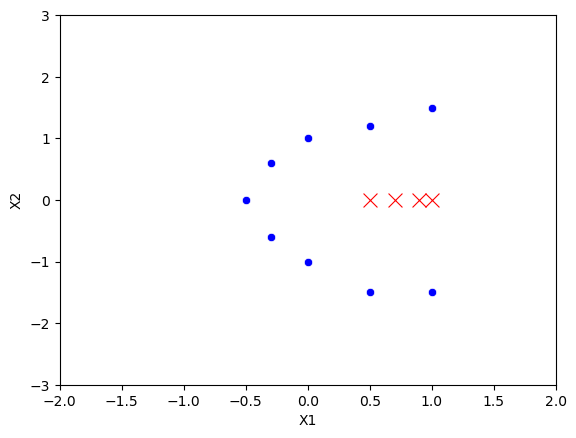

In [5]:
# 散布図の表示（X1＝〇、X2＝×）
sns.scatterplot(x=X1[0],y=X1[1],marker="o",color="b")
sns.scatterplot(x=X2[0],y=X2[1],marker="x",color="r",s=100)

# 表示範囲の調整
plt.xlim([-2,2])
plt.ylim([-3,3])

# 軸ラベルの設定
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### 3-3. 線形カーネル関数の適用
- グラム行列 (Gram matrix) 
    - $(i, j)$成分がベクトル$x_i,x_j$の内積である行列


In [6]:
# 関数の定義
def k_linear(x, x_):
    """
    線形カーネル関数
    """
    return np.dot(x, x_)

# データの個数を取得
N = X.shape[1]
# 空のグラム行列を作成
K = np.zeros([N, N])

# 関数の計算
for i in range(N):
    x = X[:,i]
    for j in range(N):
        x_ = X[:,j]
        k = k_linear(x, x_)
        K[i, j] = k

# グラム行列の表示
df = pd.DataFrame(K)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.45,-0.27,0.75,-0.87,0.6,-0.6,0.15,0.60,-1.20,-0.15,-0.21,-0.27,-0.3
1,-0.27,0.45,-1.05,0.57,-0.6,0.6,0.15,-1.20,0.60,-0.15,-0.21,-0.27,-0.3
2,0.75,-1.05,2.50,-1.55,1.5,-1.5,-0.25,2.75,-1.75,0.25,0.35,0.45,0.5
3,-0.87,0.57,-1.55,1.69,-1.2,1.2,-0.25,-1.30,2.30,0.25,0.35,0.45,0.5
4,0.60,-0.60,1.50,-1.20,1.0,-1.0,0.00,1.50,-1.50,0.00,0.00,0.00,0.0
5,-0.60,0.60,-1.50,1.20,-1.0,1.0,0.00,-1.50,1.50,0.00,0.00,0.00,0.0
6,0.15,0.15,-0.25,-0.25,0.0,0.0,0.25,-0.50,-0.50,-0.25,-0.35,-0.45,-0.5
7,0.60,-1.20,2.75,-1.30,1.5,-1.5,-0.50,3.25,-1.25,0.50,0.70,0.90,1.0
8,-1.20,0.60,-1.75,2.30,-1.5,1.5,-0.50,-1.25,3.25,0.50,0.70,0.90,1.0
9,-0.15,-0.15,0.25,0.25,0.0,0.0,-0.25,0.50,0.50,0.25,0.35,0.45,0.5


### 3-4. 結果の確認（線形カーネル）
- ここではグラム行列のうち、9～12行目のみを表示する
    - 0～8行目は、対角成分の絶対値が大きすぎるため

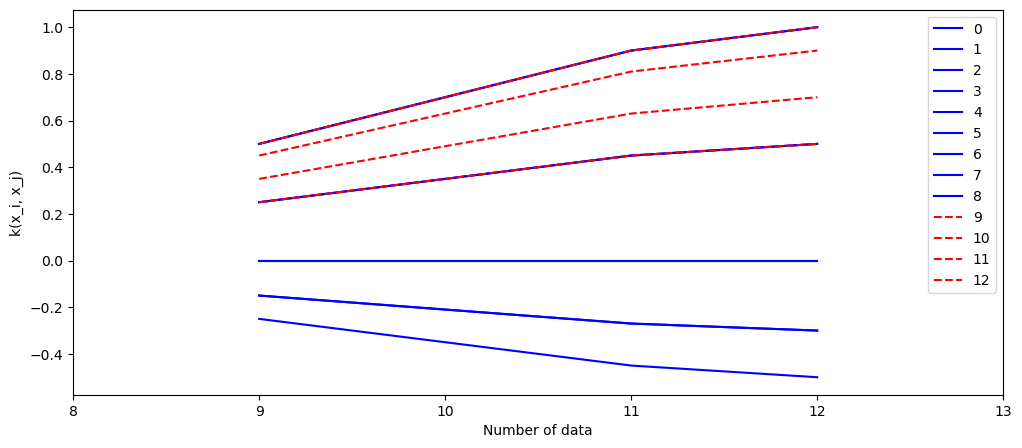

In [7]:
# X1-X2の類似度をグラフ化（青線）
# 9～12行目（X2）、0～9列目（X1）
ax1 = df.iloc[9:, :9].plot(color="b", figsize=(12,5))

# X2-X2の類似度を重ねて表示（赤線）
# 9～12行目（X2）、9～12列目（X2）
df.iloc[9:, 9:].plot(color="r", ax=ax1, ls="--")

# ラベルの設定
plt.ylabel("k(x_i, x_j)") # 類似度
plt.xlabel("Number of data") # データの片方
plt.legend(loc="best")
# 表示範囲の調整
plt.xlim([8, 13])
plt.show()

* DATA_TYPE=1の場合
    * 0～8列目の値(X1とX2の類似度)と、9～12列目の値(X2どうしの類似度)が離れている
    * 元のデータの距離をうまく表現できている
  
* DATA_TYPE=2の場合
    * 0～8列目の値(X1とX2の類似度)と、9～12列目の値(X2どうしの類似度）が重なっている
    * それぞれ同じ程度の類似度になっている

### 3-5. ガウスカーネル関数の適用

In [8]:
# カーネル関数の定義
def k_gauss(x, x_, gamma):
    """
    ガウスカーネル関数
    """
    return np.exp(-gamma*np.power(np.linalg.norm(x - x_), 2))

# パラメータの設定
gamma = 1 # ここを変更

# データの個数を取得
N = X.shape[1]
# 空のグラム行列を作成
K = np.zeros([N,N])

# 関数の計算
for i in range(N):
    x = X[:,i]
    for j in range(N):
        x_ = X[:,j]
        k = k_gauss(x, x_, gamma=gamma)
        K[i, j] = k

# グラム行列の表示
df = pd.DataFrame(K.round(2))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.00,0.24,0.23,0.02,0.78,0.07,0.67,0.08,0.00,0.37,0.26,0.17,0.13
1,0.24,1.00,0.01,0.37,0.07,0.78,0.67,0.00,0.08,0.37,0.26,0.17,0.13
2,0.23,0.01,1.00,0.00,0.61,0.00,0.04,0.78,0.00,0.11,0.10,0.09,0.08
3,0.02,0.37,0.00,1.00,0.01,0.75,0.09,0.00,0.71,0.24,0.23,0.20,0.18
4,0.78,0.07,0.61,0.01,1.00,0.02,0.29,0.29,0.00,0.29,0.23,0.16,0.14
5,0.07,0.78,0.00,0.75,0.02,1.00,0.29,0.00,0.29,0.29,0.23,0.16,0.14
6,0.67,0.67,0.04,0.09,0.29,0.29,1.00,0.01,0.01,0.37,0.24,0.14,0.11
7,0.08,0.00,0.78,0.00,0.29,0.00,0.01,1.00,0.00,0.08,0.10,0.10,0.11
8,0.00,0.08,0.00,0.71,0.00,0.29,0.01,0.00,1.00,0.08,0.10,0.10,0.11
9,0.37,0.37,0.11,0.24,0.29,0.29,0.37,0.08,0.08,1.00,0.96,0.85,0.78


### 3-6. 結果の確認（ガウスカーネル）

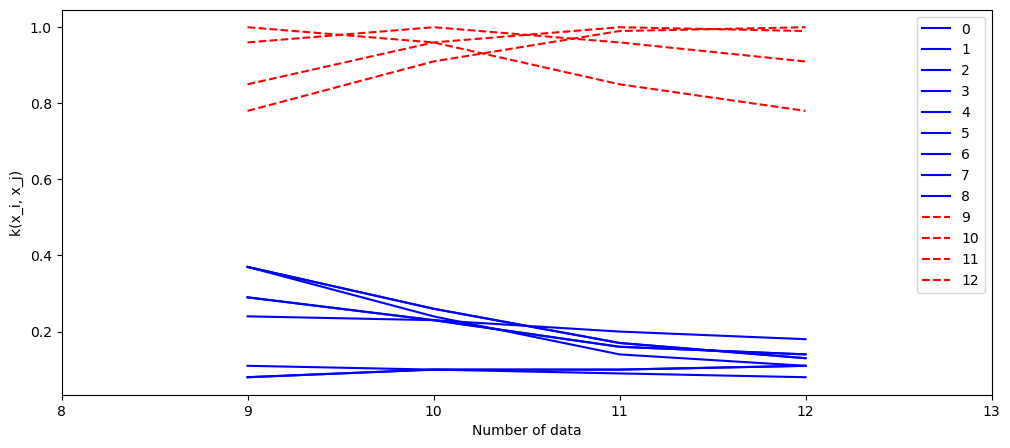

In [9]:
# X1-X2の類似度をグラフ化（青線）
# 9～12行目（X2）、0～9列目（X1）
ax1 = df.iloc[9:, :9].plot(color="b", figsize=(12,5))

# X2-X2の類似度を重ねて表示（赤線）
# 9～12行目（X2）、9～12列目（X2）
df.iloc[9:, 9:].plot(color="r", ax=ax1, ls="--")

# ラベルの設定
plt.ylabel("k(x_i, x_j)") # 類似度
plt.xlabel("Number of data") # データの片方
plt.legend(loc="best")
# 表示範囲の調整
plt.xlim([8, 13])
plt.show()

* DATA_TYPE=1,2の両方において
    * 0～8列目の値(X1とX2の類似度)と、9～12列目の値(X2どうしの類似度)が離れている
    * 元のデータの距離をうまく表現できている
  


### [演習]
* DATA_TYPE（データの生成条件）を変更してみよう
* ガウスカーネルの$\gamma$の値も変えてみよう